This notebook is based on the excellent tutorial "Humble Intro to Analysis with Pandas and Seaborn" by Chris Crawford that you may find [here](https://www.kaggle.com/crawford/humble-intro-to-analysis-with-pandas-and-seaborn/notebook).

In [2]:
# Import libraries
# Numpy for arrays and series
import numpy as np

#Pandas for dataframes
import pandas as pd

#Matplotlib for plotting graphs
import matplotlib.pyplot as plt

#Seaborn for more advanced graphs
import seaborn as sns

#inline matplotlib
%matplotlib inline

In [3]:
# Import the data from the csv file. 
# The data file is not stored in this repo so it has to be downloaded from the link above.
database = 'database.csv'

# Create a DataFrame named df with the content of the csv file
# Due to size we are suppressing low memory warnings
df = pd.read_csv(database, low_memory=False)

The next few cells contain some simple commands to begin our exploration of the data

In [3]:
# shape (rows, columns)
df.shape

(174104, 66)

In [4]:
# head(n) - show only the first n rows in the dataframe, n = 5 by default
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# tail(n) - the last n rows in the dataframe, n = 5 by default
df.tail(7)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
174097,365836,2015,9,30,ASQ,EXPRESSJET AIRLINES,EMB-135,A,332,13,...,0,0,0,0,0,0,0,0,0,0
174098,365837,2015,9,30,FDX,FEDEX EXPRESS,DC-10-10,A,583,24,...,0,0,0,0,0,0,0,0,0,0
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0
174103,365823,2015,9,30,AWI,AIR WISCONSIN AIRLINES,CRJ100/200,A,188,10,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# display a list of columns
df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [7]:
# display information about the index
df.index

RangeIndex(start=0, stop=174104, step=1)

From the quick views above there seem to be some UNKNOWNs and NaNs in the data. So some cleaning will be necessary.

In [10]:
# display list of columns with datatypes and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
Record ID               174104 non-null int64
Incident Year           174104 non-null int64
Incident Month          174104 non-null int64
Incident Day            174104 non-null int64
Operator ID             174104 non-null object
Operator                174104 non-null object
Aircraft                174104 non-null object
Aircraft Type           133074 non-null object
Aircraft Make           131051 non-null object
Aircraft Model          122439 non-null object
Aircraft Mass           127320 non-null float64
Engine Make             123434 non-null float64
Engine Model            121988 non-null object
Engines                 127342 non-null float64
Engine Type             127282 non-null object
Engine1 Position        126193 non-null object
Engine2 Position        118715 non-null float64
Engine3 Position        11659 non-null object
Engine4 Position        3092 non-null float6

Several columns are of type object, that can cause a problem. Several columns have less than 174104 non-null values. We can re-read the data with options to remove nulls.

In [4]:
df = pd.read_csv(database,
                low_memory=False,
                na_values=['UNKNOWN', 'UNK'], #Add these to the list of NULLS
                na_filter=True,
                skip_blank_lines=True)


In [12]:
#And just to see what we got
df.shape

(174104, 66)

In [5]:
# Restrict the columns
column_list = ["Incident Year",
              "Incident Month",
              "Incident Day",
              "Operator",
              "State",
              "Airport",
              "Flight Phase",
              "Species Name"]

# Create a new dataframe
df = pd.DataFrame(data=df, columns=column_list)

# Drop all nulls
df = df.dropna(thresh=8)

# reset the index because we dropped several rows
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111175 entries, 0 to 111174
Data columns (total 8 columns):
Incident Year     111175 non-null int64
Incident Month    111175 non-null int64
Incident Day      111175 non-null int64
Operator          111175 non-null object
State             111175 non-null object
Airport           111175 non-null object
Flight Phase      111175 non-null object
Species Name      111175 non-null object
dtypes: int64(3), object(5)
memory usage: 6.8+ MB


value_counts(): counts the number of ocurences of a value in the array
get_values(): unique list of values in the array

In [15]:
# Show number of incidents per operator (only the top ten)
df["Operator"].value_counts().head(10)

BUSINESS              12290
SOUTHWEST AIRLINES    12080
AMERICAN AIRLINES      8627
MILITARY               7891
UNITED AIRLINES        7797
DELTA AIR LINES        5384
FEDEX EXPRESS          5250
1US AIRWAYS            3660
UPS AIRLINES           2936
SKYWEST AIRLINES       2762
Name: Operator, dtype: int64

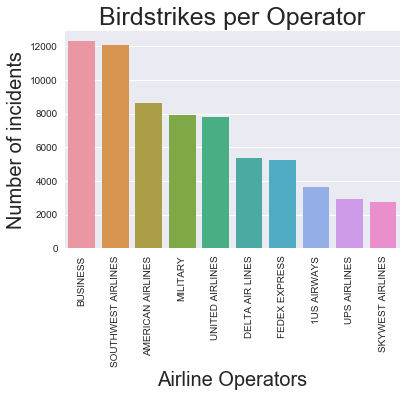

In [22]:
# Now to draw a bar plot
# get the counts per operator
operator_counts = df.Operator.value_counts()

#extract just the names from that list for convenience
operators = operator_counts.index

# extract the counts from the list for convenience
counts = operator_counts.get_values()

# create the barplot

#rotate the x labels to make them fit better
plt.xticks(rotation=90)

# label the x-axis
plt.xlabel("Airline Operators", fontsize=20)

# label the y-axis
plt.ylabel("Number of incidents", fontsize=20)

# Add a main title
plt.title("Birdstrikes per Operator", fontsize=25)

# only try to plot the first 10 as the full list will be useless
barplot = sns.barplot(x=operators[:10], y=counts[:10])



Potentially change the colours in the plot by reading this [article](http://seaborn.pydata.org/tutorial/color_palettes.html) or this [article](https://chrisalbon.com/python/seaborn_color_palettes.html).

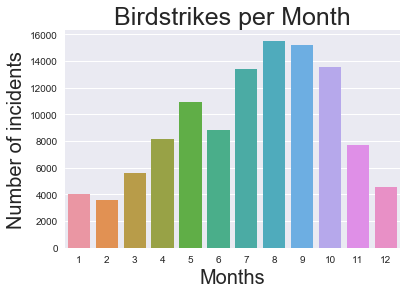

In [6]:
# Chart showing strikes per month
# label the x-axis
plt.xlabel("Months", fontsize=20)

# label the y-axis
plt.ylabel("Number of incidents", fontsize=20)

# Add a main title
plt.title("Birdstrikes per Month", fontsize=25)

# get the counts per month
month_counts = df['Incident Month'].value_counts()

#extract just the names  of months from that list for convenience
months = month_counts.index

# extract the counts from the list for convenience
counts = month_counts.get_values()


barplot = sns.barplot(x=months, y=counts)

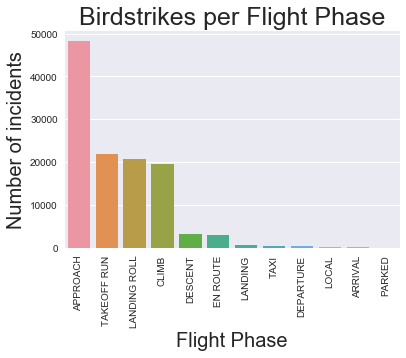

In [7]:
# Chart showing strikes per flight phase
# label the x-axis
plt.xlabel("Flight Phase", fontsize=20)

# label the y-axis
plt.ylabel("Number of incidents", fontsize=20)

# Add a main title
plt.title("Birdstrikes per Flight Phase", fontsize=25)

# get the counts per phase
phase_counts = df['Flight Phase'].value_counts()

#extract just the names  of phases from that list for convenience
phases = phase_counts.index

# extract the counts from the list for convenience
counts = phase_counts.get_values()

#rotate the x labels to make them fit better
plt.xticks(rotation=90)

barplot = sns.barplot(x=phases, y=counts)